

## Evaluación del recurso eólico

##### Proyecto, Chávez Bartolo Julieta Janeth






Hoy día la producción de énergía eólica ya parece ser un negocio viable, pues sus costos han disminuído considerablemente gracias al desarrollo tecnológico y a la implementación de proyectos para la evaluación del recurso.
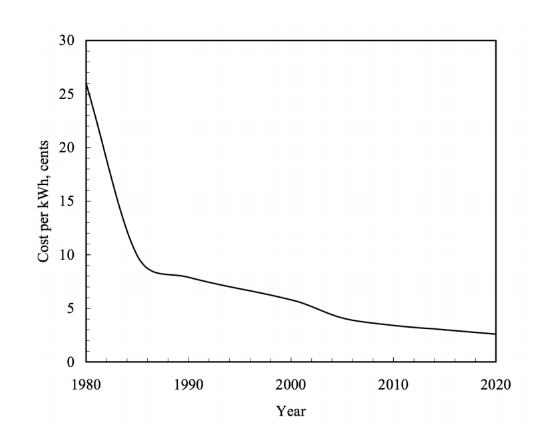


Sin embargo el costo de un proyecto de instalación de turbina eólica sigue siendo alto en cualquier sentido, desde la máquina hasta la mano de obra. Aquí sus porcentajes de costo como inversión inicial:

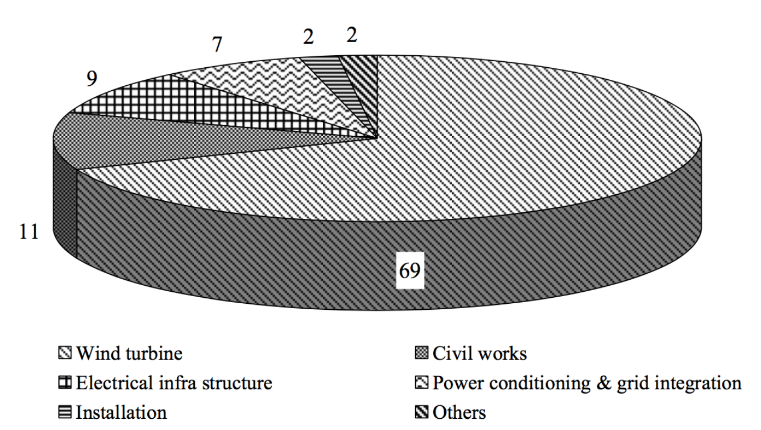

Y después del gasto inicial habrá que tomar en cuenta los costos de operación y mantenimiento. Que rondan en el 2% anualmente del costo inicial. Y como el dinero cambia su valor conforme el tiempo avanza, en general se toma una tasa de interés de 5% de la inversión inicial. Por ello es importante traer al presente el costo anualizado, lo cuál lo podemos hacer como:

$$c=\frac{C_I}{8760 n}(\frac{1}{P_R C_F}\{1+m[\frac{(1+I)^n-1}{I(1+I)^n}]\})$$

Ya que si $P_F$ es la potencia nominal de la turbina y $C_F$ es el fáctor de capacidad, la energía generada en un año es:


$$8760 P_F C_F$$

$I$ es la tasa de ínteres y $n$ es la cantidad de años a estimar.

### Curva de potencias de un aérogenerador
El aerogenerador que se elija deberá tener una curva de potencia que encaje con las velocidades de viento del citio en el que se desee poner el aerogenerador. Ya que por ejemplo, si se omite este paso es posible que gastemos 2o millones de pesos en la turbina, pero sea inservible para el lugar porque podría ser que las velocidades del sitio nunca sean suficientes para la velocidad de arranque o bien es posible que sean demasiado fuertes como para romperlo, forzando al aerogenerador a estar detenido la mayor parte del tiempo. Este es el ejemplo perfecto de cuando se tiene un gran recurso eólico, pero no se puede aprobechar a causa de un mal estudio.
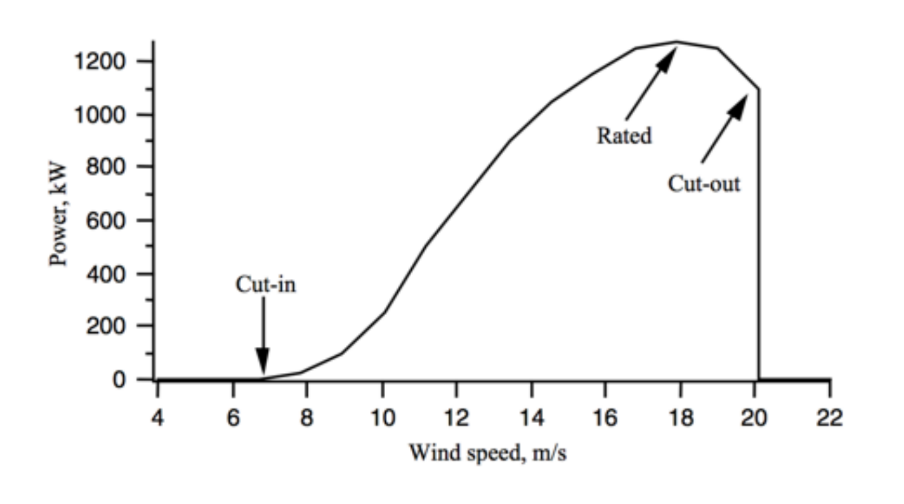

In [1]:
#Importar liberias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from windrose import WindroseAxes
from scipy.stats import norm
from scipy.stats import rayleigh
from scipy.stats import weibull_max
from scipy.stats import weibull_min
import math

ModuleNotFoundError: No module named 'seaborn'

In [2]:
#Importar datos en un data frame  llamado df
df = pd.read_csv('M06_201711.txt', skiprows=[1,2], sep=" ")
#Renombro las columnas como se indica para que Pandas reconozca la estampa de tiempo
df.rename(columns={'YYYY':'year','MM':'month',
                   'DD':'day', 'hh':'hour',
                   'mm':'minute'}, inplace=True)

df


,year,month,day,hour,minute,WS_80mA_mean,WS_80mA_min,WS_80mA_max,WS_80mA_stdev,WS_80mB_mean,...,Rad_80m_stdev,DENSIDAD_15m_mean,DENSIDAD_15m_min,DENSIDAD_15m_max,DENSIDAD_15m_stdev,BATERIA_mean,BATERIA_min,BATERIA_max,BATERIA_stdev,Unnamed: 65
0,2017,11,1,0,0,7.9980,5.78430,9.8262,0.81147,8.04410,...,0.0,1.983,1.974,1.992,0.003,12.85,NaN,NaN,NaN,NaN
1,2017,11,1,0,10,7.5565,5.47340,8.8934,0.71261,7.54670,...,0.0,2.008,1.983,2.014,0.004,12.69,NaN,NaN,NaN,NaN
2,2017,11,1,0,20,7.5254,5.78430,8.8934,0.63488,7.49080,...,0.0,2.004,1.992,2.017,0.006,12.83,NaN,NaN,NaN,NaN
3,2017,11,1,0,30,6.9534,5.16250,7.9607,0.61436,6.94360,...,0.0,2.024,2.008,2.039,0.006,12.84,NaN,NaN,NaN,NaN
4,2017,11,1,0,40,6.9658,5.78430,7.9607,0.49746,6.96850,...,0.0,2.044,2.033,2.055,0.005,12.84,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,2017,11,30,23,20,3.0067,2.36430,3.6080,0.32459,3.07020,...,0.0,1.184,1.184,1.185,0.000,12.80,12.80,12.80,NaN,NaN
4317,2017,11,30,23,30,3.0981,2.36430,3.6080,0.30718,3.14670,...,0.0,1.185,1.184,1.186,0.000,12.80,12.80,12.80,NaN,NaN
4318,2017,11,30,23,40,2.8991,2.05340,3.2971,0.32335,2.94150,...,0.0,1.187,1.185,1.188,0.000,12.79,12.79,12.80,NaN,NaN
4319,2017,11,30,23,50,1.7071,0.80978,2.9862,0.59135,1.74710,...,0.0,1.186,1.186,1.188,0.000,12.79,12.79,12.79,NaN,NaN


Podemos observar que las mediciones se realizaron durante el invierno, durante el mes de diciembre de 2017. Y se registraron cada 10 segundos, eso nos da 4320 mediciones.

In [3]:
df.insert(0,'time',pd.DataFrame({'time': pd.to_datetime(df[['year','month','day','hour','minute']])}))
df.drop(['year','month','day','hour','minute'], axis=1, inplace=True)

df

,time,WS_80mA_mean,WS_80mA_min,WS_80mA_max,WS_80mA_stdev,WS_80mB_mean,WS_80mB_min,WS_80mB_max,WS_80mB_stdev,WS_60m_mean,...,Rad_80m_stdev,DENSIDAD_15m_mean,DENSIDAD_15m_min,DENSIDAD_15m_max,DENSIDAD_15m_stdev,BATERIA_mean,BATERIA_min,BATERIA_max,BATERIA_stdev,Unnamed: 65
0,2017-11-01 00:00:00,7.9980,5.78430,9.8262,0.81147,8.04410,6.10430,9.5239,0.79147,7.01530,...,0.0,1.983,1.974,1.992,0.003,12.85,NaN,NaN,NaN,NaN
1,2017-11-01 00:10:00,7.5565,5.47340,8.8934,0.71261,7.54670,5.79340,9.2130,0.68951,6.79750,...,0.0,2.008,1.983,2.014,0.004,12.69,NaN,NaN,NaN,NaN
2,2017-11-01 00:20:00,7.5254,5.78430,8.8934,0.63488,7.49080,5.79340,8.9021,0.63107,6.61710,...,0.0,2.004,1.992,2.017,0.006,12.83,NaN,NaN,NaN,NaN
3,2017-11-01 00:30:00,6.9534,5.16250,7.9607,0.61436,6.94360,5.17170,7.9695,0.59687,6.11930,...,0.0,2.024,2.008,2.039,0.006,12.84,NaN,NaN,NaN,NaN
4,2017-11-01 00:40:00,6.9658,5.78430,7.9607,0.49746,6.96850,5.48260,7.9695,0.51667,6.24370,...,0.0,2.044,2.033,2.055,0.005,12.84,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,2017-11-30 23:20:00,3.0067,2.36430,3.6080,0.32459,3.07020,2.37390,3.6173,0.31211,1.72650,...,0.0,1.184,1.184,1.185,0.000,12.80,12.80,12.80,NaN,NaN
4317,2017-11-30 23:30:00,3.0981,2.36430,3.6080,0.30718,3.14670,2.06300,3.6173,0.30279,1.91810,...,0.0,1.185,1.184,1.186,0.000,12.80,12.80,12.80,NaN,NaN
4318,2017-11-30 23:40:00,2.8991,2.05340,3.2971,0.32335,2.94150,2.37390,3.6173,0.33636,1.70470,...,0.0,1.187,1.185,1.188,0.000,12.79,12.79,12.80,NaN,NaN
4319,2017-11-30 23:50:00,1.7071,0.80978,2.9862,0.59135,1.74710,0.50863,2.9956,0.60620,0.99040,...,0.0,1.186,1.186,1.188,0.000,12.79,12.79,12.79,NaN,NaN


In [4]:
# Quito las columnas que se indican
df.drop(columns=['WS_80mA_min','WS_80mA_max','WS_80mB_min','WS_80mB_max','WS_60m_mean','WS_60m_stdev','WS_60m_min',
                 'WS_60m_max','WS_20m_mean','WS_20m_stdev','WS_20m_min','WS_20m_max','WS_40m_max','WS_40m_min','WD_58m_min', 'WD_58m_max',
                 'WD_78m_min','WD_78m_max','Rad_80m_min','Rad_80m_max','RH_15m_min', 'RH_15m_max','temp_80m_min', 'temp_80m_max','temp_15m_min', 'temp_15m_max',
                  'temp_40m_min', 'temp_40m_max',
                 'P_15m_min','P_15m_max','BATERIA_mean','BATERIA_min','BATERIA_max','BATERIA_stdev','DENSIDAD_15m_min','DENSIDAD_15m_max','Unnamed: 65'], axis=1, inplace=True)

# Le pido a pandas que me diga los títulos de las columnas que quedan 
df.columns

Index(['time', 'WS_80mA_mean', 'WS_80mA_stdev', 'WS_80mB_mean',
       'WS_80mB_stdev', 'WS_40m_mean', 'WS_40m_stdev', 'WD_78m_mean',
       'WD_78m_stdev', 'WD_58m_mean', 'WD_58m_stdev', 'temp_80m_mean',
       'temp_80m_stdev', 'temp_40m_mean', 'temp_40m_stdev', 'temp_15m_mean',
       'temp_15m_stdev', 'RH_15m_mean', 'RH_15m_stdev', 'P_15m_mean',
       'P_15m_stdev', 'Rad_80m_mean', 'Rad_80m_stdev', 'DENSIDAD_15m_mean',
       'DENSIDAD_15m_stdev'],
      dtype='object')

In [5]:
df

,time,WS_80mA_mean,WS_80mA_stdev,WS_80mB_mean,WS_80mB_stdev,WS_40m_mean,WS_40m_stdev,WD_78m_mean,WD_78m_stdev,WD_58m_mean,...,temp_15m_mean,temp_15m_stdev,RH_15m_mean,RH_15m_stdev,P_15m_mean,P_15m_stdev,Rad_80m_mean,Rad_80m_stdev,DENSIDAD_15m_mean,DENSIDAD_15m_stdev
0,2017-11-01 00:00:00,7.9980,0.81147,8.04410,0.79147,6.00120,0.89967,317.9,4.561,312.9,...,24.02,0.028,84.1,0.062,1000.0,0.091,0.0,0.0,1.983,0.003
1,2017-11-01 00:10:00,7.5565,0.71261,7.54670,0.68951,5.63460,0.66916,323.9,4.381,319.7,...,23.76,0.028,84.2,0.130,1000.0,0.069,0.0,0.0,2.008,0.004
2,2017-11-01 00:20:00,7.5254,0.63488,7.49080,0.63107,5.73400,0.76857,325.7,3.702,320.9,...,23.95,0.028,84.7,0.166,1000.0,0.091,0.0,0.0,2.004,0.006
3,2017-11-01 00:30:00,6.9534,0.61436,6.94360,0.59687,5.29290,0.70582,327.1,3.704,321.5,...,23.87,0.038,85.2,0.153,1000.0,0.081,0.0,0.0,2.024,0.006
4,2017-11-01 00:40:00,6.9658,0.49746,6.96850,0.51667,5.36750,0.58528,326.7,3.786,322.2,...,23.77,0.035,85.7,0.095,1000.0,0.160,0.0,0.0,2.044,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,2017-11-30 23:20:00,3.0067,0.32459,3.07020,0.31211,0.62803,0.30445,227.4,3.696,213.3,...,19.39,0.036,88.8,0.193,1007.0,0.093,0.0,0.0,1.184,0.000
4317,2017-11-30 23:30:00,3.0981,0.30718,3.14670,0.30279,0.73987,0.26965,225.4,3.400,210.7,...,19.23,0.074,88.9,0.439,1007.0,0.150,0.0,0.0,1.185,0.000
4318,2017-11-30 23:40:00,2.8991,0.32335,2.94150,0.33636,0.56155,0.31004,229.9,2.766,217.3,...,18.79,0.120,89.3,0.605,1007.0,0.086,0.0,0.0,1.187,0.000
4319,2017-11-30 23:50:00,1.7071,0.59135,1.74710,0.60620,0.88340,0.49954,217.6,17.020,180.4,...,18.77,0.069,90.7,0.254,1007.0,0.073,0.0,0.0,1.186,0.000


Gráfiquemos la serie temporal para ver cómo varía la velocidad del viento durante ese mes. Observamos que la intensidad parece ser la misma para cada medición,  siendo casi siempre mayor a 80m que a 40m.

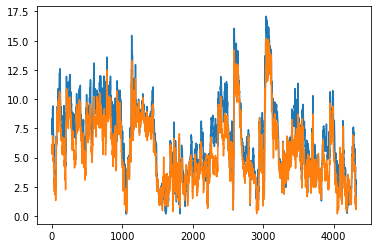

In [6]:
#Uso matplotlib para mi primer gráfica de la serie temporal
df.WS_80mA_mean.plot()
df.WS_40m_mean.plot()

A continuación vemos gráficamente la diferencia que existe en la velocidad del viento entre una altura de $80m$ y $40m$ graficando en su espacio fase.

Podemos decir que la diferencia es importante. Entre más parecidas fueran tendería a una recta identidad.

[Text(0, 0.5, 'Vel 80m '), Text(0.5, 0, 'Vel 40m')]

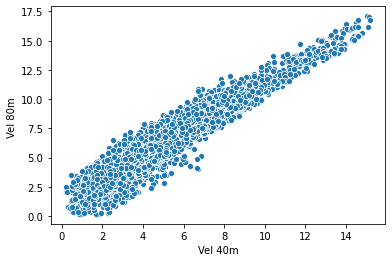

In [7]:
ext=sns.scatterplot(df.WS_40m_mean,df.WS_80mA_mean)
#sns.jointplot(x="WS_40m_mean", y="WS_80mA_mean", data=df, kind="reg");
ext.set(xlabel="Vel 40m", ylabel = "Vel 80m ")


El hacer la rosa de vientos es adecuado para saber la orientación a la que se colocar el aerogenerador, existen mecanismos de orientación en algunos de ellos que se pueden programar para que giren de acuerdo a la mayor probabilidad de viento durante el día o la noche, inclusive por estaciones.

A partir de ver la rosa de viento podemos asegurar que la dirección adecuada para colocar el aerogenerador es a los 135°.

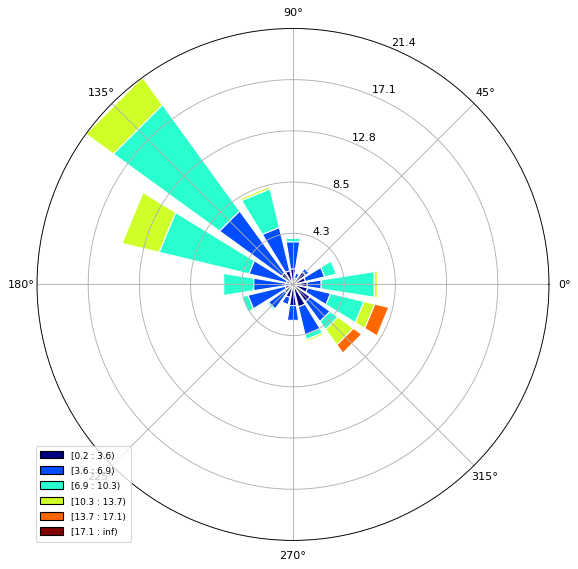

In [8]:
ax = WindroseAxes.from_ax()
ax.bar(df.WD_58m_mean, df.WS_80mA_mean, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

El cálculo de la potencia eólica es de vital importancia en la evaluación del recurso eólico.

La energía cinética del viento puede calcularse si se supone que el aire pasa por un cilindro , que encierra un área A a una velocidad de viento V.

$$\rightarrow P=\frac{E_c}{s}=\frac{1}{2}\rho AV^3$$

La densidad de potencia se define como la potencia por unidad de área. $\frac{P}{A}=[W/m^2]$

Y como es de esperar existen diversas formas de calcular la el recurso eólico, esto siempre depende de la presición y la cantidad de nuestros datos. 

### Uso directo de datos
 La densidad de potencia promedio por unidad de área la calculamos como:
 
 $\overline{P}/A=\frac{1}{2}\rho \frac{1}{N} \sum_{i=1}^N AU_i^3$

Ahora la densidad de energía por unidad de área en un tiempo $N\Delta t$.

 $\overline{E}/A=\frac{1}{2}\rho \frac{1}{N} \sum_{i=1}^N AU_i^3 N\Delta t=\frac{\overline{P}}{A} N\Delta t$ 


La potencia media del aerogenerador $\overline{P_w}$ es:

$\overline{P_w}=\frac{1}{N} \sum_{i=1}^N P_w(U_i)$

Con $P_w$ es la potencia de salida definida por la curva de potencia del aerogenerador.

Por lo tanto la energía del aerógenerador, $E_w$:

$$\Rightarrow E_w= \sum_{i=1}^N P_w(U_i) \Delta t$$

### Técnicas estádisticas

Para esto antes habrá que elegir una buena función de probabilidad $p(U)$ que se ajuste a los datos de viento de la localidad y si se cuenta con la curva de potencia del aérogenerador de interes entonces, $P_w$, entonces la potencia la potencia media,$\overline{P_w}$, del aérogenerador será:

$\overline{P_w}= \int_{0}^\infty P_w(U)p(U)dU$


Al histograma de las velocidades del viento se le debe ajustar una distribución que modele nuestros datos, para ello es importante el hecho que usemos la mejor distribución. Usaré una distribución Weibul ampliamente utilizada en el campo, ya que una de sus ventajas es el hecho que inicia en cero, pensando a las "velocidades del viento como positivas" es decir, solamente sus magnitudes, datos que tenemos.


Una variable x tiene una distribución Weibul si su función de probabilidad f tiene la forma:

$$f(x)=\frac{\alpha}{\beta}(\frac{X}{\beta})^{\alpha-1} e^{-(\frac{X}{\beta})^{\alpha}}$$ con $$\alpha,\beta,X>0$$

Con $X$ la velocidad promedio,

$\alpha$ un parámetro de forma,

y $\beta$ un parámetro de escala.

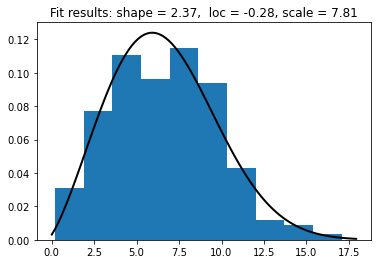

In [9]:
#Fit weibul normal distribution
par= weibull_min.fit(df.WS_80mA_mean)

# Plot Histogram
plt.hist(df.WS_80mA_mean, density=True)

# Plot weibull
xmin, xmax = plt.xlim()
x = np.linspace(0, xmax, 100)
p = weibull_min.pdf(x, par[0], par[1],par[2])
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: shape = %.2f,  loc = %.2f, scale = %.2f" % (par[0], par[1],par[2])
plt.title(title)

plt.show()

Ahora cargemos la curva de potencia del aerogenerador que nos interesa.

In [10]:
vestas=pd.read_csv('Vestas.csv')
vestas

,Vel [m/s],Pow[kW]
0,0,0
1,1,0
2,2,0
3,3,61
4,4,156
5,5,283
6,6,452
7,7,669
8,8,951
9,9,1289


No handles with labels found to put in legend.


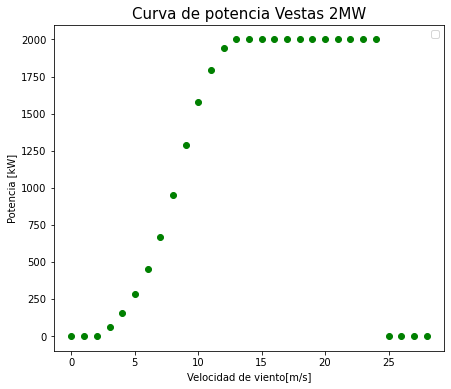

In [11]:
#Curva de potencias vestas
plt.figure(figsize=(7,6))
plt.scatter(vestas['Vel [m/s]'],vestas['Pow[kW]'], color='green')
plt.ylabel('Potencia [kW]')
plt.xlabel('Velocidad de viento[m/s]')
plt.savefig('vestaspot.png')
plt.title('Curva de potencia Vestas 2MW',fontsize = 15, color = 'black', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.legend()

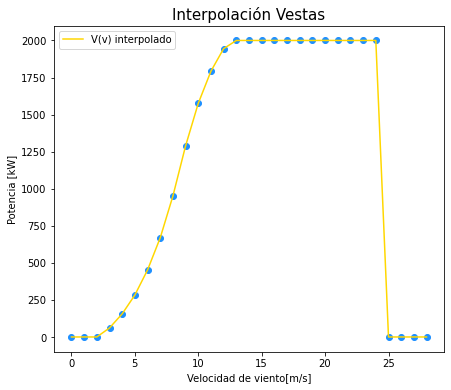

In [12]:
from scipy.interpolate import interp1d
ves = interp1d(vestas['Vel [m/s]'],vestas['Pow[kW]'])

#Evaluar los valores de la velocidad a 80 m en la función de curva de pontencia para Vestas
potvestas=pd.Series([0,2,3,4,5]) #arreglo potencias para velocidades a 80m
j=0
for j in range(0,len(df.WS_80mA_mean)):
    potvestas[j]=ves(df.WS_80mA_mean[j])

plt.figure(figsize=(7,6))
plt.scatter(vestas['Vel [m/s]'],vestas['Pow[kW]'], color='dodgerblue')
plt.plot(vestas['Vel [m/s]'],ves(vestas['Vel [m/s]']),color='gold',label='V(v) interpolado')

plt.ylabel('Potencia [kW]')
plt.xlabel('Velocidad de viento[m/s]')
plt.title('Interpolación Vestas',fontsize = 15, color = 'black', verticalalignment = 'baseline', horizontalalignment = 'center')
plt.legend()

La vida útil de un aérogenerador suele ser entre 15-30 años. Claro que esto depende del mantenimiento que se le de y de cómo es el tipo de flujo de viento al que esté sometido. Sin embargo, estimaremos a una vida de 20 años. En el caso ideal deberíamos tener medidas durande dos años, sin embargo, no tengo esos datos. Por lo que para este trabajo supondré un comportamiento parecido a este mes durante el resto del año.

In [13]:
#Esta es la energía que produciría el aerogenerador para el mes evaluado
Mensual=potvestas.sum()
# Solo tenemos un mes y hay que estimar para los 20 años
# El término 1/6 es por la resolución temporal de la serie de tiempo, se mide cada 10 s=1/6 min 
EAP=Mensual*12*(1/6)*20
print('La energia producida en el tiempo de vida de proyecto es: ', EAP, 'kW')

La energia producida en el tiempo de vida de proyecto es:  127231646.55600043 kW


In [14]:
#costo de cada AG $2,200 USD por kW Instalado
#Calculando la inversión inicial.
CI=2200*2000


In [15]:
#O&M anual para cada AG 
omvestas=0.05*CI
print('Operacion y mantenimiento (USD)',omvestas)
#definir funcion traer al presente

def pre(cap,i,n):
    return cap*( ((1+i)**n -1 )/ i*(1+i)**n)
#Valor presente de o&m

OyM=pre(omvestas,0.05,20)
OyM
print('Operacion y mantenimiento (USD) devaluación',OyM)

Operacion y mantenimiento (USD) 220000.0
Operacion y mantenimiento (USD) devaluación 19301440.43071303


$$Costos\ totales=Inverción\ inicial\ + Operación\ y\ Mantenimiento$$

In [16]:
#Calculo de los costos
Costos= CI+OyM
print('Considerando Costo Inicial y OyM tenemos: ',Costos, 'USD')

Considerando Costo Inicial y OyM tenemos:  23701440.43071303 USD


El costo de la energía está dado por:

$$C_E=\frac{Costos\ totales}{Energía\ Anual\ Producida}$$

In [17]:
CE=Costos/EAP
print('El costo de la energía (USD/kWh): ',CE,'USD')

El costo de la energía (USD/kWh):  0.18628573214511493 USD


### $0.831$ pesos
Datos de la Comisión Federal de Electricidad (CFE), señalan que durante enero de este 2020, los usuarios estarán pagando $0.831\  pesos\ =\ 0.041\  USD$ por cada uno de los primeros 75 kilowatts-hora en el rango de consumo básico. 

Lo cual dejaría a este aerogenerador una de ganancia de $-2.77\ pesos\ =\  -0.138\ USD$en méxico. Esta energía no dejaría ganancias en méxico. 

En hogares en EUA el precio es $0.149\  USD\  por\  kWh$. El precio promedio en el mundo es $0.140\  USD\  por\  kWh$. No habiendo ganancias en EUA y en parte del mercado mundial. 

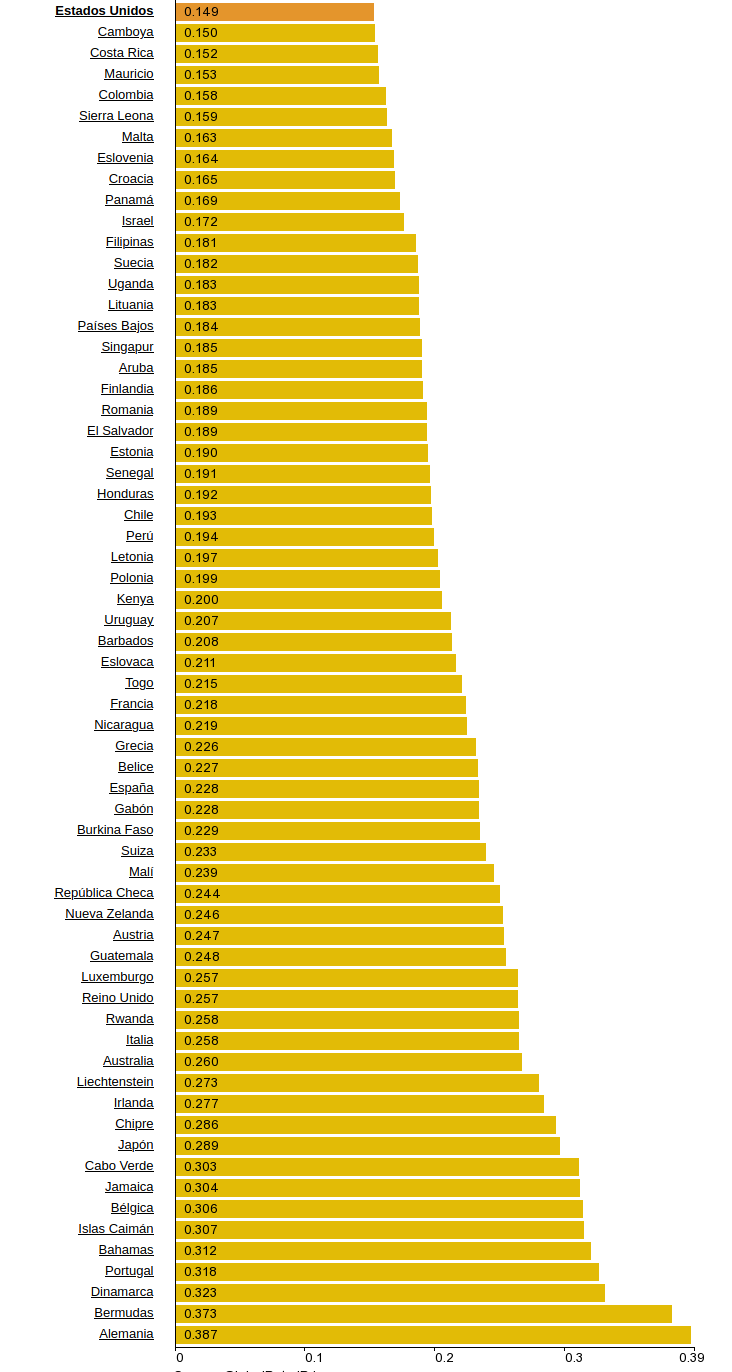

En conclución al ser este estudio hecho para un lugar en EUA, este aerogenerador no sería competitivo ni mucho menos un proyecto rentable. Aconsejo ya sea buscar un lugar con mejores condiciones atmosféricas o bien vender esta energía en otro país. Pero esto no parece posible porque el almacenamiento de energía suele tener costes muy altos.

Ahora calculemos la eficiencia que tendría instalar un aerogenerador en este sitio: Para lo cual hay que obtener la densidad de energía como se explica anteriormente que seria la máxima energía a aprovechar teoricamente. Con ello obtenemos la razón respecto a la energía anual producida.

$$\eta=\frac{Energía\ Anual\ Producida}{Energía\ teórica}$$

Recordando que el aerogenerador Vestas $2MW$ tiene un diámetro de $90 m$. 

$\rightarrow A=\pi 45^2 $

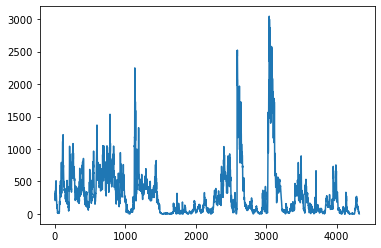

In [18]:
#Calculo la densidad de potencia
power=0.5*1.22*df.WS_80mA_mean**3
power.plot()


In [19]:
Dens_EnergTeo_mensual=power.sum()

EnergTeo=Dens_EnergTeo_mensual*3.1416*45*45*12*(1/6)

eficiencia=EAP/EnergTeo
eficiencia

0.007648587473518997

Con esto podemos ver la eficiencia del aerogenerador sigue siendo muy débil. De apenas el $0.7\%$. Confirmando que poner un aerogenerador en este lugar no es rentable.